In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [37]:
def r_squared(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred)**2)/np.sum((y_true - np.mean(y_true))**2))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def plot_forecast(y_train, y_test, y_forecast, trim = 300):
    T = len(y_train)
    horizon = len(y_test)
    fig = plt.figure(figsize = (8,4.5))
    plt.plot(range(trim, T), y_train[trim:], label = 'train')
    plt.xlabel('Период')
    plt.ylabel('Значение')
    plt.title(r'Тренинговая, тестовая выборки и прогноз')
    plt.plot(range(T, T + horizon), y_test, label = 'test')
    plt.plot(range(T, T + horizon), y_forecast, label = 'forecast')
    plt.legend()
    plt.show()

In [38]:
sales = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_vinyl_sales.csv', index_col = 0)
sales.index = pd.to_datetime(sales.index)
sales.index.freq = 'W-SUN'
sales = sales['item_cnt_day']
sales.head()

date
2013-01-06    63.0
2013-01-13    55.0
2013-01-20    52.0
2013-01-27    89.0
2013-02-03    74.0
Freq: W-SUN, Name: item_cnt_day, dtype: float64

In [39]:
y_train = sales.iloc[:-10]
y_test = sales.iloc[-10:]

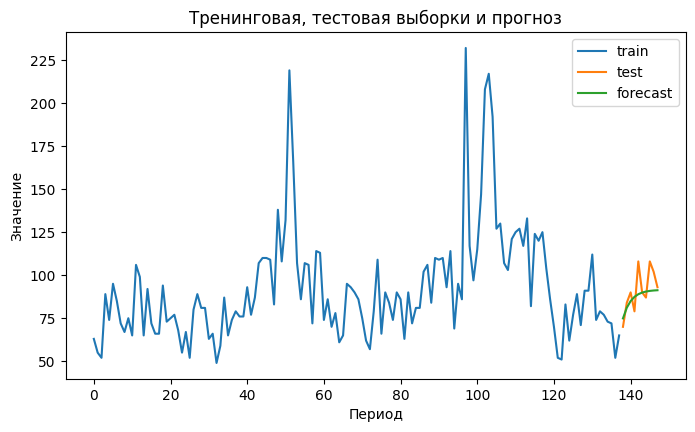

R-squared: 0.32168746483163047
RMSE: 9.58668688285804
MAPE: 7.6879886509980455


In [40]:
results = sm.tsa.arima.ARIMA(y_train, order=(1, 0, 0)).fit()
y_fcst = results.forecast(steps = 10)
plot_forecast(y_train, y_test, y_fcst, trim = 0)
print('R-squared:', r_squared(y_test, y_fcst))
print('RMSE:', root_mean_squared_error(y_test, y_fcst))
print('MAPE:', mean_absolute_percentage_error(y_test, y_fcst))

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

print('R-squared:', r2_score(y_test, y_fcst))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_fcst)))
print('MAPE:', mean_absolute_percentage_error(y_test, y_fcst))

R-squared: 0.32168746483163047
RMSE: 9.58668688285804
MAPE: 0.07687988650998046


C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


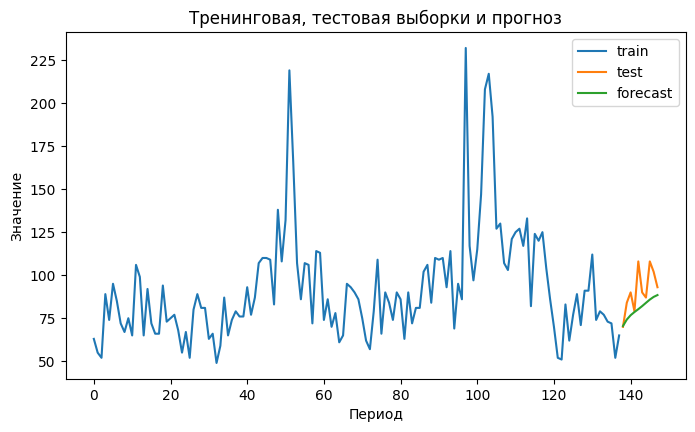

R-squared: -0.35905289618492264
RMSE: 13.56974859399006
MAPE: 0.10539324231437949


In [42]:
results = sm.tsa.arima.ARIMA(y_train, order=(3, 0, 3)).fit()
y_fcst = results.forecast(steps = 10)
plot_forecast(y_train, y_test, y_fcst, trim = 0)
print('R-squared:', r_squared(y_test, y_fcst))
print('RMSE:', root_mean_squared_error(y_test, y_fcst))
print('MAPE:', mean_absolute_percentage_error(y_test, y_fcst))

In [32]:
evaluations = pd.DataFrame(columns = ['i', 'r2', 'rmse', 'mape'])
steps = 10
cv_samples = 10
row = 0

for i in range(steps):
    y_pred_array = []
    y_test_array = []
    for j in range(cv_samples):
        y_train = sales.iloc[:-(cv_samples+steps-j)]
        y_test = sales.iloc[-(cv_samples+steps-j)+i]
        #print(cv_samples+j, np.where(y == y_train[0]), np.where(y == y_train[-1]), np.where(y == y_test))
        results = sm.tsa.arima.ARIMA(y_train, order=(1, 0, 0)).fit()
        y_fcst = results.forecast(steps = 1)
        y_pred_array.append(y_fcst[0])
        y_test_array.append(y_test)
    r2 = r_squared(np.array(y_test_array), np.array(y_pred_array))
    rmse = root_mean_squared_error(np.array(y_test_array), np.array(y_pred_array))
    mape = mean_absolute_percentage_error(np.array(y_test_array), np.array(y_pred_array))
    #print(i, r2, rmse, mape)
    df = pd.DataFrame({'i' : i, 'r2' : r2, 'rmse' : rmse, 'mape' : mape}, index = [row])
    evaluations = pd.concat([evaluations, df])
#         plot_forecast(y_train, y_test, y_fcst, trim = i - 90)
#         row += 1

C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\Ap

C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\Ap

C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\Ap

C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\AppData\Local\Temp\ipykernel_16968\1690669241.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_array.append(y_fcst[0])
C:\Users\D\Ap

In [33]:
evaluations

,i,r2,rmse,mape
0,0,-0.033972,249.642124,16.650014
0,1,-0.231671,282.114213,20.504953
0,2,-0.934597,412.378755,25.061701
0,3,-2.613922,352.140584,23.342241
0,4,-2.295272,329.823788,22.574188
0,5,-1.837969,579.513298,25.342649
0,6,-1.330905,511.423954,25.109651
0,7,-1.204393,489.838177,25.238840
0,8,-0.742942,493.967107,24.620420
0,9,-0.876440,366.675056,17.956362
